<a href="https://colab.research.google.com/github/dude10116/DavisGrahamCosc470s24/blob/main/solutions/DavisGrahamGameOfLifeSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The world will be an n x n size grid. Enter a value for n: 10
Enter proportion (a number between 0 and 1) of cells that should start as alive: 0.3
Enter the number of generations for the game of life to run: 10


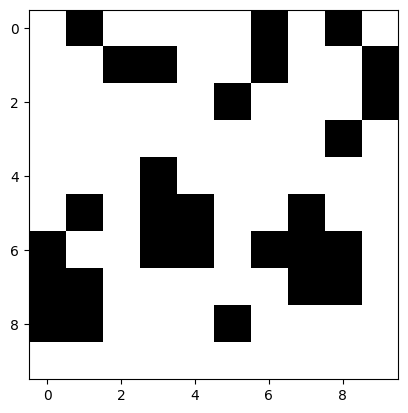

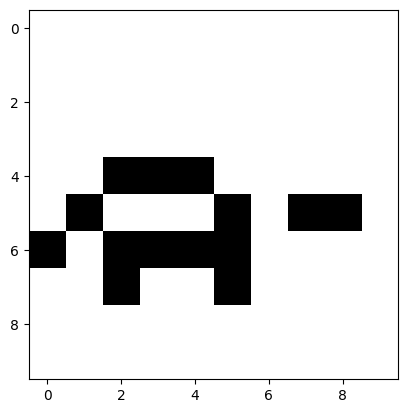

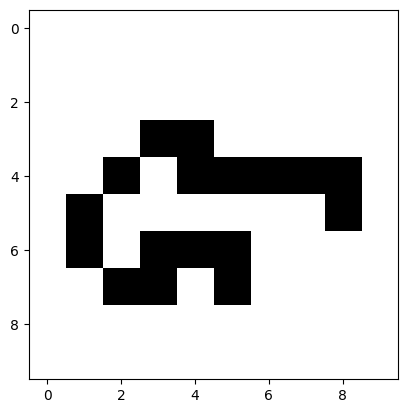

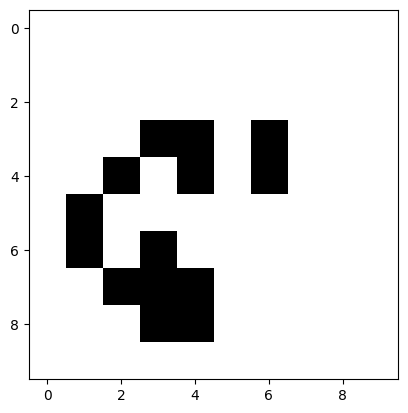

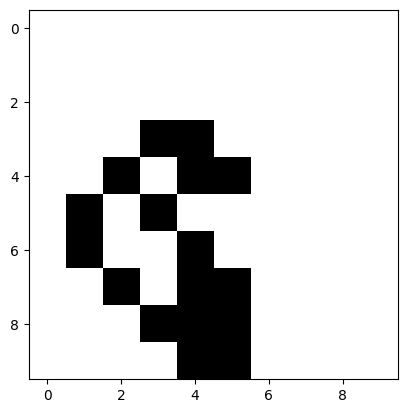

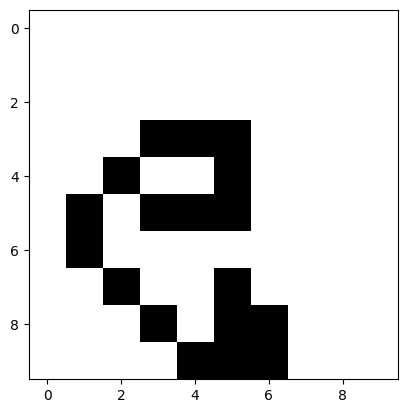

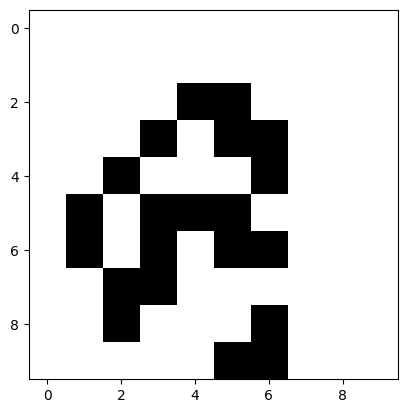

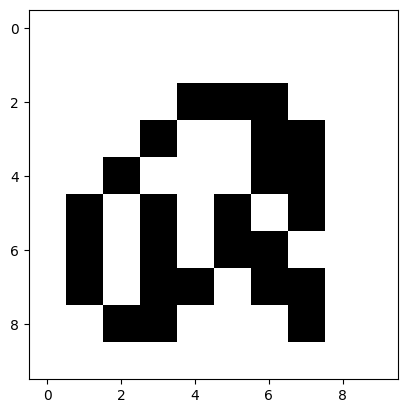

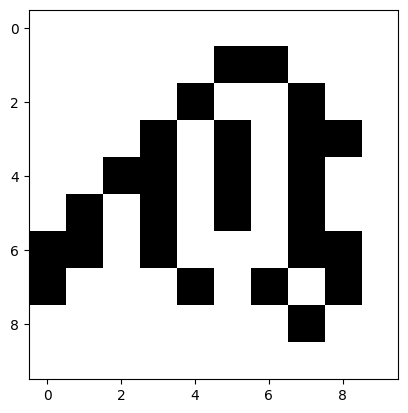

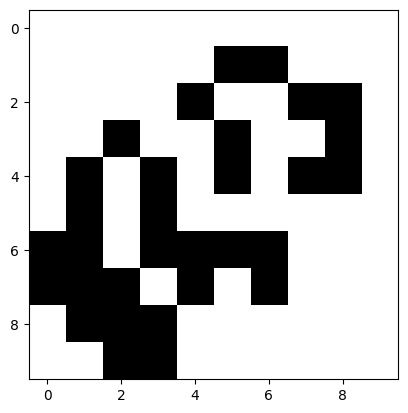

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 27 14:02:07 2016
Modified 28 October 2022

@author: pcutter

Program Description:  This program implements Conway's game of life.eeeee

"""
import random
import numpy as np
import matplotlib.pyplot as plt

""" This function randomly generates a world for Conway's game of life.
PARAMETERS:
    wsize - The world is represented by a wsize x wsize list
    p1 - Proportion of cells that should be 1 (alive) when the program starts

RETURNS:
    world - A wsize x wsize list of 1s and 0s
"""
def generateWorld(size, alive_probability):
    # Create a new world of the given size
    world = [[0 for _ in range(size)] for _ in range(size)]

    # Set a certain percentage of cells to be initially alive
    for i in range(size):
        for j in range(size):
            if random.random() < alive_probability:
                world[i][j] = 1

    return world

""" This function counts the number of 1s among the eight neighbors
    of cell at world[row][col].  Neighborhoods wrap at the edges of the list.
PARAMETERS:
    world - a 2d list of 0s and 1s
    row, col - the position in the world to check
RETURNS:
    numNeighbors - the number of neighbors equal to 1
"""

def countNeighbors(world, x, y):
    # Initialize count of neighbors
    count = 0

    # Check each of the cell's 8 neighbors
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            elif (x+i >= 0 and x+i < len(world)) and (y+j >= 0 and y+j < len(world[0])):
                count += world[x+i][y+j]

    return count

""" This function checks to see if a cell should live
PARAMETERS:
    world - A 2d list of 0s and 1s
    row, col - The position in the world to check
RETURNS:
    1 if the cell should live
    0 otherwise
"""
def isAlive(world, x, y):
    # Get the number of live neighbors
    live_neighbors = countNeighbors(world, x, y)

    # Apply the Game of Life rules
    if world[x][y] == 1 and (live_neighbors < 2 or live_neighbors > 3):
        return 0
    elif world[x][y] == 0 and live_neighbors == 3:
        return 1
    else:
        return world[x][y]

""" This function runs the game of life simulation
PARAMETERS:
    wsize - The world is represented by a square wsize list
    gens - The number of generations to simulate
    prop_alive - Proportion of cells that should be 1 when the program starts
                 This should be a real number in the range [0, 1].
"""
def simulation(world, generations):
    # Create a new world for the next generation
    nextWorld = [[0 for _ in range(len(world[0]))] for _ in range(len(world))]

    # Update each cell in the nextWorld
    for gen in range(generations):
        for i in range(len(world)):
            for j in range(len(world[0])):
                nextWorld[i][j] = isAlive(world, i, j)

        # Update the world to the next generation
        world = nextWorld

        # Display the world as a grid of black and white squares
        plt.imshow(world, cmap='Greys',  interpolation='nearest')
        plt.show()

    return nextWorld

""" This function is the starting point for Conway's game of life.
It gets input from the user for the size of the world, the number of generations,
and the proportion of cells that should be alive.  It then runs the simulation
"""

def main():
    # Prompt the user for the size of the world
    size = int(input("The world will be an n x n size grid. Enter a value for n: "))

    # Prompt the user for the probability that a cell is initially alive
    alive_probability = float(input("Enter proportion (a number between 0 and 1) of cells that should start as alive: "))

    # Prompt the user for the number of generations to simulate
    generations = int(input("Enter the number of generations for the game of life to run: "))

    # Generate the initial world
    world = generateWorld(size, alive_probability)

    # Run the simulation and display each generation
    simulation(world, generations)

main()

